# **Data cleaning, Calculating and Interpreting Correlations**

## **🧹 Data Cleaning**

### **🛠️ Import all the needed libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### **📥 Load the data**

Load the data by the following link:\
https://docs.google.com/spreadsheets/d/1F0Bpis2Dkc_liAePBOOw-sqZaO1RGhM9o4olTKsYjxs

In [ ]:
df = pd.read_excel("https://docs.google.com/spreadsheets/d/1F0Bpis2Dkc_liAePBOOw-sqZaO1RGhM9o4olTKsYjxs" +'/export?format=xlsx')

### **👀 1st Look**

Let's take a look at the loaded data.

Output 5 random rows:

In [ ]:
# YOUR CODE
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,15:05:00,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,17:40:00,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50:00,20:05:00,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Then it's reasonable to take a look at columns, dtypes and non-null values. Let's output this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          43730 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

### **🔧 Types fixing**

#### **1️⃣ Automatic fixing**

Remove Invalid Column for Analysis

In [ ]:
del df['ID']
del df['Delivery_person_ID']

... and then show columns and types again.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Order_Date                   45584 non-null  datetime64[ns]
 7   Time_Orderd                  43853 non-null  object        
 8   Time_Order_picked            45584 non-null  object        
 9   Weather_conditions           44968 non-null  object        
 10  Road_traffic_density         44983 non-null  object        
 11  Vehicle_condition            45584 non-nu

In [ ]:
list_col_name = ['Weather_conditions','Vehicle_condition','Road_traffic_density','Type_of_vehicle','Type_of_order','Festival','City']
df[list_col_name] = df[list_col_name].astype('string')

In [ ]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce',format="%H:%M:%S")
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce',format="%H:%M:%S")

Seems to be okay now. Let's finally output a sample and move forward.

### **📦 Handling Missing Values**

Let's check which of the columns contain missing values using the method `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43730 non-null  float64       
 1   Delivery_person_Ratings      43676 non-null  float64       
 2   Restaurant_latitude          45584 non-null  float64       
 3   Restaurant_longitude         45584 non-null  float64       
 4   Delivery_location_latitude   45584 non-null  float64       
 5   Delivery_location_longitude  45584 non-null  float64       
 6   Order_Date                   45584 non-null  datetime64[ns]
 7   Time_Orderd                  39785 non-null  datetime64[ns]
 8   Time_Order_picked            40577 non-null  datetime64[ns]
 9   Weather_conditions           44968 non-null  string        
 10  Road_traffic_density         44983 non-null  string        
 11  Vehicle_condition            45584 non-nu

In [ ]:
def replace_MedianValue_For_MisingValue_With_NumberCol(col_name):
  for i in col_name:
    # Lấy giá trị Mean của 'DateOfBirth'
    MissingValue = df[i].median()
    # Replace giá trị Null bằng giá trị Mean
    df[i] = df[i].fillna(MissingValue)

In [ ]:
def replace_ModeValue_For_MisingValue_With_StringCol(col_name):
  for i in col_name:
    # Lấy giá trị Mean của 'DateOfBirth'
    MissingValue = df[i].mode()[0]
    # Replace giá trị Null bằng giá trị Mean
    df[i] = df[i].fillna(MissingValue)

In [ ]:
list_number_col_name = ['Delivery_person_Ratings','Delivery_person_Age','multiple_deliveries']
replace_MedianValue_For_MisingValue_With_NumberCol(list_number_col_name)
list_str_col_name = ['Weather_conditions','Road_traffic_density','City','Festival']
replace_ModeValue_For_MisingValue_With_StringCol(list_str_col_name)

In [ ]:
# drop all null/na values
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35407 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          35407 non-null  float64       
 1   Delivery_person_Ratings      35407 non-null  float64       
 2   Restaurant_latitude          35407 non-null  float64       
 3   Restaurant_longitude         35407 non-null  float64       
 4   Delivery_location_latitude   35407 non-null  float64       
 5   Delivery_location_longitude  35407 non-null  float64       
 6   Order_Date                   35407 non-null  datetime64[ns]
 7   Time_Orderd                  35407 non-null  datetime64[ns]
 8   Time_Order_picked            35407 non-null  datetime64[ns]
 9   Weather_conditions           35407 non-null  string        
 10  Road_traffic_density         35407 non-null  string        
 11  Vehicle_condition            35407 non-null  s

In [ ]:
import numpy as np
# add them 1 cot 'Pick_time' để tính thời gian lấy hàng từ lúc order
#df['Pick_time'] = (df['Time_Order_picked'] - df['Time_Orderd'])/ np.timedelta64(1, 'm')


Seems to be okay now. Let's finally output a sample and move forward.

### **📜 Fixing Inconsistencies in Strings**

There is the column `Class`, that should contain the limited number of unique values (categorical ones).

But if it has different letter case or other inconsistencies, it will influence on an analysis results.

Let's check the unique values and Then convert it from String to Category to make it faster and less memory consuming.

In [ ]:
def check_unique_and_convert_Category(col_name):
  for i in col_name:
    df[i].unique()
    df[i] = df[i].astype('category')

In [ ]:
list_col = ['Weather_conditions','Vehicle_condition','Road_traffic_density','Type_of_vehicle','Type_of_order','Festival','City']
check_unique_and_convert_Category(list_col)

<ipython-input-71-ed69668524df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype('category')


## **🔗  EXPORT DATA TO DATABASE**

In [ ]:
df.to_csv('Delivery.csv', index=False)

## **🔗  Calculating Correlations**

### **🧮 Calculations**


#### Measures of central tendency

Make the same dataframe containing the measures of central tendency for Time_Taken as we did for whole dataset. Then output it.

In [ ]:
def compare_tip_dynamic_dimension(input_dimension):
  ## agg by dimension
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),
                                    Time_taken_max = ('Time_taken (min)','max'),
                                    Time_taken_mean = ('Time_taken (min)','mean'),
                                    Time_taken_median = ('Time_taken (min)','median'))
  df_agg_detail = df_agg_detail.T
  df_agg_detail = df_agg_detail.reset_index()

  ## agg all df
  df_agg = df.agg(Time_taken_min = ('Time_taken (min)','min'),
                Time_taken_max = ('Time_taken (min)','max'),
                Time_taken_mean = ('Time_taken (min)','mean'),
                Time_taken_median = ('Time_taken (min)','median')
                                  )
  df_agg.columns = ["all"]
  df_agg = df_agg.reset_index()

  df_compare = df_agg.merge(df_agg_detail,"inner", on = "index")
  return df_compare

In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Delivery_person_Age")


,index,all,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0
0,Time_taken_min,10.000000,10.000000,10.000000,10.0000,10.00000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
1,Time_taken_max,54.000000,54.000000,54.000000,54.0000,54.00000,54.000000,54.000000,53.000000,54.000000,...,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000
2,Time_taken_mean,26.344452,23.031884,22.898078,23.0067,23.04994,23.061652,22.798724,22.828701,23.068129,...,29.057956,30.0,29.945931,29.397831,29.648086,29.743956,29.440687,29.297312,29.589433,29.77707
3,Time_taken_median,26.000000,22.000000,22.000000,22.0000,22.00000,22.000000,22.000000,22.000000,22.000000,...,28.000000,29.0,29.000000,28.000000,29.000000,29.000000,29.000000,28.000000,29.000000,29.00000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Delivery_person_Ratings")

,index,all,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
0,Time_taken_min,10.000000,31.000000,32.000000,31.000,31.000000,31.0,31.0,31.000000,31.000,...,15.000000,15.000000,15.000000,15.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,44.000000,44.000000,41.000,43.000000,44.0,34.0,44.000000,44.000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,36.666667,38.722222,35.625,37.133333,38.6,32.8,35.761905,36.375,...,34.739168,34.569298,34.634783,34.792857,23.551104,24.635606,24.27698,24.038075,24.197611,25.576816
3,Time_taken_median,26.000000,35.500000,39.000000,35.500,37.000000,39.0,33.0,35.000000,36.000,...,34.000000,34.000000,34.000000,35.000000,23.000000,24.000000,24.00000,23.000000,23.000000,25.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Time_Orderd")

,index,all,1900-01-01 08:10:00,1900-01-01 08:15:00,1900-01-01 08:20:00,1900-01-01 08:25:00,1900-01-01 08:30:00,1900-01-01 08:35:00,1900-01-01 08:40:00,1900-01-01 08:45:00,...,1900-01-01 22:55:00,1900-01-01 23:10:00,1900-01-01 23:15:00,1900-01-01 23:20:00,1900-01-01 23:25:00,1900-01-01 23:30:00,1900-01-01 23:35:00,1900-01-01 23:40:00,1900-01-01 23:45:00,1900-01-01 23:50:00
0,Time_taken_min,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,34.000000,34.000000,33.00000,34.000000,33.000000,34.000000,34.000000,34.000000,...,43.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,43.000000,43.000000
2,Time_taken_mean,26.344452,19.449102,19.644068,19.52459,19.455056,19.530387,20.057692,19.092593,19.664234,...,22.313208,22.777778,23.142061,22.890819,22.086247,22.013825,22.473934,22.045346,22.713725,21.447154
3,Time_taken_median,26.000000,19.000000,19.000000,19.00000,18.000000,19.000000,19.000000,18.500000,19.000000,...,21.000000,22.000000,22.000000,22.000000,21.000000,21.000000,22.000000,21.000000,22.000000,21.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Time_Order_picked")

,index,all,1900-01-01 08:15:00,1900-01-01 08:20:00,1900-01-01 08:25:00,1900-01-01 08:30:00,1900-01-01 08:35:00,1900-01-01 08:40:00,1900-01-01 08:45:00,1900-01-01 08:50:00,...,1900-01-01 23:10:00,1900-01-01 23:15:00,1900-01-01 23:20:00,1900-01-01 23:25:00,1900-01-01 23:30:00,1900-01-01 23:35:00,1900-01-01 23:40:00,1900-01-01 23:45:00,1900-01-01 23:50:00,1900-01-01 23:55:00
0,Time_taken_min,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,34.000000,34.000000,34.000000,34.000000,32.000000,34.000000,34.000000,34.000000,...,40.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
2,Time_taken_mean,26.344452,19.511111,19.563636,19.621212,19.431579,19.535294,19.902299,19.397959,19.829016,...,22.137097,22.282759,23.297071,22.71358,22.972569,22.301843,22.025445,22.245192,22.803653,21.591731
3,Time_taken_median,26.000000,17.000000,19.000000,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,...,21.000000,22.000000,22.000000,22.00000,22.000000,21.500000,21.000000,22.000000,22.000000,21.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Weather_conditions")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,Cloudy,Fog,Sandstorms,Stormy,Sunny,Windy
0,Time_taken_min,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,54.000000,54.000000,54.00000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,28.944615,28.946032,25.98593,25.997155,21.859886,26.223635
3,Time_taken_median,26.000000,29.000000,28.000000,26.00000,26.000000,20.000000,26.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Road_traffic_density")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,High,Jam,Low,Medium
0,Time_taken_min,10.000000,10.000000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,54.000000,54.000000,44.000000,49.000000
2,Time_taken_mean,26.344452,27.216662,31.137873,21.241368,26.736878
3,Time_taken_median,26.000000,27.000000,31.000000,20.000000,27.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Vehicle_condition")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,0,1,2
0,Time_taken_min,10.000000,10.00000,10.000000,10.000000
1,Time_taken_max,54.000000,54.00000,49.000000,49.000000
2,Time_taken_mean,26.344452,30.14744,24.384328,24.495302
3,Time_taken_median,26.000000,28.00000,24.000000,24.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Type_of_order")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,Buffet,Drinks,Meal,Snack
0,Time_taken_min,10.000000,10.000000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,54.000000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,26.295616,26.296797,26.477634,26.307151
3,Time_taken_median,26.000000,26.000000,25.000000,26.000000,26.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Type_of_vehicle")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,electric_scooter,motorcycle,scooter
0,Time_taken_min,10.000000,10.000000,10.000000,10.000000
1,Time_taken_max,54.000000,49.000000,54.000000,49.000000
2,Time_taken_mean,26.344452,24.473924,27.641208,24.516233
3,Time_taken_median,26.000000,24.000000,26.000000,24.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("multiple_deliveries")

,index,all,0.0,1.0,2.0,3.0
0,Time_taken_min,10.000000,10.000000,10.000000,31.000000,42.000000
1,Time_taken_max,54.000000,54.000000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,22.907997,26.770862,40.366645,47.867857
3,Time_taken_median,26.000000,22.000000,26.000000,40.000000,48.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("Festival")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,No,Yes
0,Time_taken_min,10.000000,10.000000,38.000000
1,Time_taken_max,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,25.959176,45.530846
3,Time_taken_median,26.000000,25.000000,45.000000


In [ ]:
#['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
compare_tip_dynamic_dimension("City")

<ipython-input-74-9ed899625e07>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg_detail = df.groupby(input_dimension).agg(Time_taken_min = ('Time_taken (min)','min'),


,index,all,Metropolitian,Semi-Urban,Urban
0,Time_taken_min,10.000000,10.000000,44.000000,10.000000
1,Time_taken_max,54.000000,54.000000,54.000000,54.000000
2,Time_taken_mean,26.344452,27.208169,49.661765,22.937016
3,Time_taken_median,26.000000,26.000000,49.000000,22.000000


##### **>>>> Insights based on measures of central tendency comparison:**

list_col_Hist = ['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']



1.   **Delivery_person_Age:**
2.   **Delivery_person_Ratings**
2.   **Time_Orderd**
2.   **Time_Order_picked**
2.   **Weather_conditions**
2.   **Road_traffic_density**
2.   **Vehicle_condition**
2.   **Type_of_order**
2.   **Type_of_vehicle**
2.   **multiple_deliveries**
2.   **Festival**
2.   **City**




1.   City: Semi-Urban have Time - Taken is so high. Need to have a solution to fix
2.   Festival: Median of Time - Taken when have Festival is so high. Need to prepare the resource when have Festival
3.   Type_of_vehicle: motorcycle have Time - Taken is higher than another, need to reduce!
4.   Road_traffic_density: Improve navigation application, avoid congested roads
4.   Vehicle_condition: need to reduce Vehicle_condition 0

#### **Look at histograms**

There are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset Time-Taken histogram**

Plot the histogram for the whole dataset tips distribution.

In [ ]:
median_time_taken = df['Time_taken (min)'].median()
df_median_time_taken = df[df['Time_taken (min)'] > median_time_taken]

In [ ]:
def build_Histograms(list_col_Histogram,list_bins_Histogram,df,df_median):
  figure, axis = plt.subplots(len(list_col_Histogram),2,figsize=(20,(len(list_col_Histogram))*7))
  k = 0;
  for i in list_col_Histogram:
    a = list_col_Histogram[k]
    axis[k][0].hist(df[a], bins = list_bins_Histogram[k], color="#74b9ff")
    axis[k][0].set_title('Histogram of '+ a)
    #axis[k][0].grid(True)

    axis[k][1].hist(df_median[a], bins = list_bins_Histogram[k], color="red")
    axis[k][1].set_title('Histogram of '+ a +' Median')
    #axis[k][1].grid(True)

    k += 1


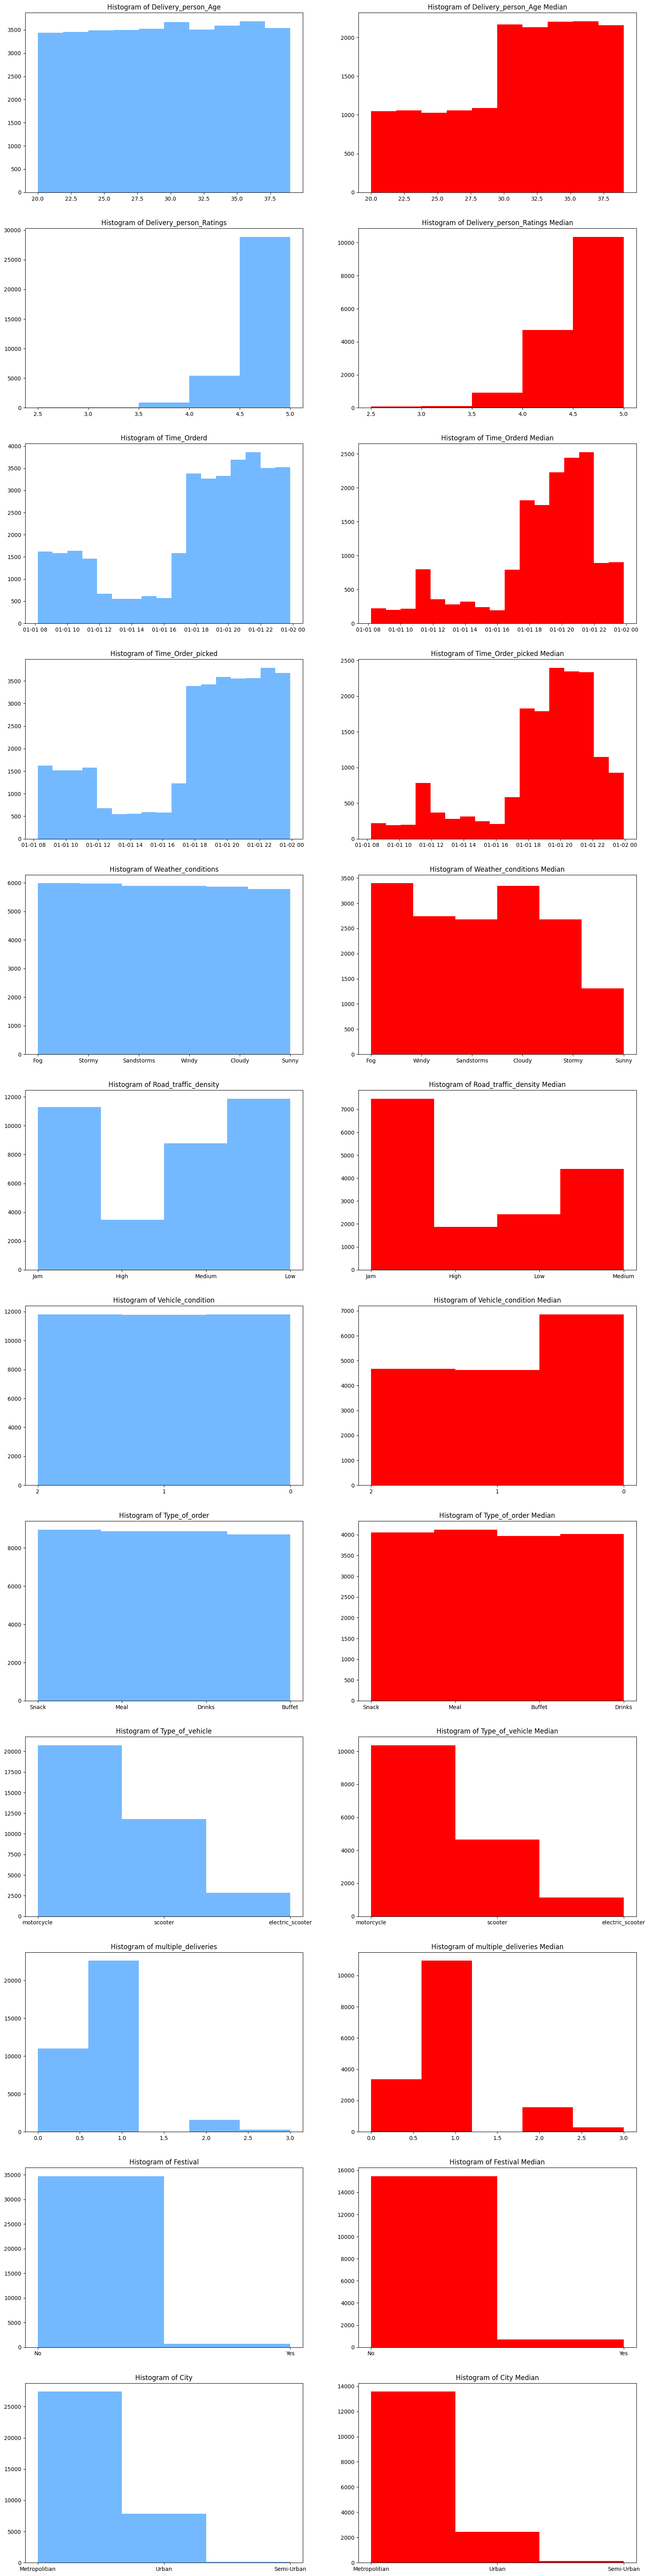

In [ ]:
list_col_Hist = ['Delivery_person_Age','Delivery_person_Ratings','Time_Orderd','Time_Order_picked','Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']
list_bin_Hist = [10,5,17,17,6,4,3,4,3,5,2,3]
build_Histograms(list_col_Hist,list_bin_Hist,df,df_median_time_taken)

Finally, get conclusion with these Histogram.

##### **>>>> Insights based on Histogram:**

1.   City: Semi-Urban have Time - Taken is so high. Need to have a solution to fix
2.   Festival: Median of Time - Taken when have Festival is so high. Need to prepare the resource when have Festival
3.   Type_of_vehicle: motorcycle have Time - Taken is higher than another, need to reduce!
4.   Road_traffic_density: Improve navigation application, avoid congested roads
4.   Vehicle_condition: need to reduce Vehicle_condition 0

In [ ]:
df_dummies = pd.get_dummies(df,columns=['Weather_conditions'])


#df_dummies = df_dummies.astype('float')

In [ ]:
del df_dummies[df.columns[0]]
del df_dummies[df.columns[1]]
del df_dummies[df.columns[2]]
del df_dummies[df.columns[3]]
del df_dummies[df.columns[4]]
del df_dummies[df.columns[5]]
del df_dummies[df.columns[6]]
del df_dummies[df.columns[7]]
del df_dummies[df.columns[8]]
#del df_dummies[df.columns[9]]
del df_dummies[df.columns[10]]
del df_dummies[df.columns[11]]
del df_dummies[df.columns[12]]
del df_dummies[df.columns[13]]
del df_dummies[df.columns[14]]
del df_dummies[df.columns[15]]
del df_dummies[df.columns[16]]

In [ ]:
df_dummies = pd.get_dummies(df, columns=['Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City'])
del df_dummies['Order_Date']
del df_dummies['Time_Orderd']
del df_dummies['Time_Order_picked']

df_dummies = df_dummies.astype('float')

... and take a look at the result's `.info()`

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35407 entries, 0 to 45583
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Delivery_person_Age               35407 non-null  float64
 1   Delivery_person_Ratings           35407 non-null  float64
 2   Restaurant_latitude               35407 non-null  float64
 3   Restaurant_longitude              35407 non-null  float64
 4   Delivery_location_latitude        35407 non-null  float64
 5   Delivery_location_longitude       35407 non-null  float64
 6   Time_taken (min)                  35407 non-null  float64
 7   Weather_conditions_Cloudy         35407 non-null  float64
 8   Weather_conditions_Fog            35407 non-null  float64
 9   Weather_conditions_Sandstorms     35407 non-null  float64
 10  Weather_conditions_Stormy         35407 non-null  float64
 11  Weather_conditions_Sunny          35407 non-null  float64
 12  Weather_c

#### Build and visualize correlation matrix
Build a correlation matrix and visualize it using heatmap.

Then plot it as a heatmap using Seaborn:

In [ ]:
def build_Heatmap(list_col):
  corr_table = df_dummies[list_col].corr()
  sns.heatmap(corr_table, annot=True, cmap='coolwarm')
  plt.figure(figsize=(400,600))
  plt.title("Delivery Correlation Matrix")

  plt.show()

In [ ]:
list_col = ['Time_taken (min)','Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
build_Heatmap(list_col)

In [ ]:
list_col = ['Time_taken (min)','Weather_conditions_Cloudy','Weather_conditions_Fog','Weather_conditions_Sandstorms','Weather_conditions_Stormy','Weather_conditions_Sunny','Weather_conditions_Windy']
build_Heatmap(list_col)

Finally, let's calculate correlations in the dataset and write insights and conclusion.

#### Model

In [ ]:
independent_feat = list(df_dummies.columns)
independent_feat.remove('Time_taken (min)')

X = df_dummies[independent_feat]
y = df_dummies['Time_taken (min)']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

### **👉 Conclusions**